In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append("../")

from ddpm.pipeline import DDPMPipeline
from ddpm.gaussian_diffusion import GaussianDiffusion
from ddpm.schedule import NoiseSchedule
import matplotlib.pyplot as plt
import torch
from torchvision.datasets import FashionMNIST
import torchvision.transforms.v2 as v2
import ddpm.utils as utils
from ddpm.unet import UNet

In [9]:
unet = torch.nn.Linear(5, 6)

In [10]:
diffusion = GaussianDiffusion(
    noise_schedule=NoiseSchedule(beta_start=1e-4, beta_end=0.02, timesteps=100),
    model=unet
)

In [11]:
convert_image_to_tensor = v2.Compose([
    v2.ToTensor(),
    v2.Resize((32, 32))
])

convert_tensor_to_image = v2.ToPILImage(mode="L")

/home/ubuntu/.cache/pypoetry/virtualenvs/ddpm-NolEjOLK-py3.10/lib/python3.10/site-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


In [16]:
dataset = FashionMNIST(root="./data", download=True, train=False)
image = dataset[0][0]

batch = convert_image_to_tensor(image).unsqueeze(0)
batch.shape

/home/ubuntu/.cache/pypoetry/virtualenvs/ddpm-NolEjOLK-py3.10/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([1, 1, 32, 32])

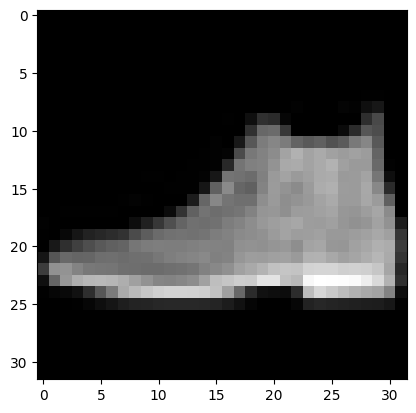

In [17]:
plt.imshow(convert_tensor_to_image(batch.squeeze(0)), cmap="gray")

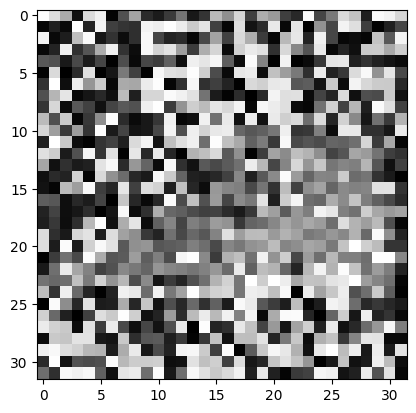

In [36]:
x_t = diffusion.q_sample(batch, torch.tensor([20]))
x_t = x_t.clip(-1, 1)
plt.imshow(convert_tensor_to_image(x_t.squeeze(0)), cmap="gray")